In [1]:
import pandas as pd
import numpy as np 
import re

In [2]:
phishing_raw_df = pd.read_csv("C:/Users/mouni/OneDrive/Documents/SEM 2/Machine Learning/project/source_dataset.csv")
# phishing_raw_df = phishing_raw_df.dropna()
# phishing_raw_df.shape

In [3]:
import lux
phishing_raw_df

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,www.voting-yahoo.com,10000000,0,0,0,20,0,0,1,20,2,1
1,www.zvon.org/xxl/WSDL1.1/Output/index.html,194914,0,1,7305,42,0,0,0,12,2,0
2,tecportais.com/file-security-update-infonfmati...,10000000,0,0,0,155,0,0,0,14,1,1
3,bima.astro.umd.edu/nemo/linuxastro/,7001,0,0,0,35,0,0,0,18,3,0
4,huarui-tec.com/js/?us.battle.net/login/en/?ref...,10000000,0,1,730,79,0,0,1,14,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95905,www.freewebs.com/ryanrules2/,5001,0,1,8035,28,0,0,0,16,2,0
95906,www.ireland-information.com/freecelticfonts.htm,230251,0,1,8400,47,0,0,1,27,2,0
95907,www.clubtaunus.soroptimist.de/img/pro/e.php,10000000,0,0,0,43,0,0,0,29,3,1
95908,www.askmen.com/sports/business/index.html,2008,0,1,9862,41,0,0,0,14,2,0


In [4]:
print(phishing_raw_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   domain          95910 non-null  object
 1   ranking         95910 non-null  int64 
 2   isIp            95910 non-null  int64 
 3   valid           95910 non-null  int64 
 4   activeDuration  95910 non-null  int64 
 5   urlLen          95910 non-null  int64 
 6   is@             95910 non-null  int64 
 7   isredirect      95910 non-null  int64 
 8   haveDash        95910 non-null  int64 
 9   domainLen       95910 non-null  int64 
 10  nosOfSubdomain  95910 non-null  int64 
 11  label           95910 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 8.8+ MB
None


In [5]:
phishing_raw_df.head()

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,www.voting-yahoo.com,10000000,0,0,0,20,0,0,1,20,2,1
1,www.zvon.org/xxl/WSDL1.1/Output/index.html,194914,0,1,7305,42,0,0,0,12,2,0
2,tecportais.com/file-security-update-infonfmati...,10000000,0,0,0,155,0,0,0,14,1,1
3,bima.astro.umd.edu/nemo/linuxastro/,7001,0,0,0,35,0,0,0,18,3,0
4,huarui-tec.com/js/?us.battle.net/login/en/?ref...,10000000,0,1,730,79,0,0,1,14,1,1


In [6]:
# Function to check for '//' or 'http' in the domain part of the URL
# Returns 1 if '//' is found within length of 7 for the given URL or if 'http' is found else returns 0
# Legitimate - 0; Phishing - 1

def regexp_check(str_to_check,url):
    if str_to_check == '//':
        double_slash = re.search(str_to_check,url)
        if double_slash:
            if double_slash.start() > 7:
                return 1
            else:
                return 0
        else:
            return 0
    else:
        http_domain = re.search('http',url)
        if http_domain:
            return 1
        else:
            return 0


In [7]:
# Feature engineering

# Insert a new column to the dataframe which shows if the URL has a '//' in the domain part.
phishing_raw_df["dslash_Redirect"] = phishing_raw_df["domain"].apply( lambda x: regexp_check('//',x))

# Insert a new column to the dataframe which shows if 'http' is found in the domain part of the URL.
phishing_raw_df["Domain_http"] = phishing_raw_df["domain"].apply( lambda x: regexp_check('http',x))

# Insert a new column to the dataframe indication the length of the URL.
# If the lenght is less than 54 then it is a legitimate site else it is a phishing site.
phishing_raw_df["urlLen"] = phishing_raw_df["urlLen"].apply( lambda x: 0 if x < 54 else 1)

# Alter the values in 'nosOfSubdomain' column of the dataframe.
# If the number of sub domains is more than 1, then it is a phishing site.
phishing_raw_df["nosOfSubdomain"] = phishing_raw_df["nosOfSubdomain"].apply( lambda x: 0 if x ==1 else 1)

# Alter the values in 'activeDuration' column of the dataframe.
# If the value is greater than 365 (1 year), then it is a legitimate site.
phishing_raw_df["activeDuration"] = phishing_raw_df["activeDuration"].apply( lambda x: 1 if x <= 365 else 0)

# Alter the values in the dataframe column 'ranking'
# If the value is greater than 100000, then it is a phishing site
phishing_raw_df["ranking"] = phishing_raw_df["ranking"].apply( lambda x: 0 if x < 100000 else 1)

# Remove the unwanted columns from the dataframe
phishing_raw_df.drop(['domainLen','domain'], inplace=True,axis=1)

# Reorder and rename the columns in the dataframe
new_columns = ['Rank','isIP','isValid','Domain_reg_len','LongURL','is@','isRedirect','haveDash','SubDomain','dslash_Redirect','Domain_http','Label']
phishing_raw_df.columns = new_columns

#Display the dataset after feature engineering
#pd.to_numeric(phishing_raw_df)

In [8]:
phishing_raw_df.groupby(["Label"])[["Label"]].count()

,Label
Label,
0,94030
1,1880


In [9]:
phishing_raw_df.describe()

,Rank,isIP,isValid,Domain_reg_len,LongURL,is@,isRedirect,haveDash,SubDomain,dslash_Redirect,Domain_http,Label
count,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000
mean,0.694224,0.000229,0.573892,0.431769,0.395767,0.002773,0.007444,0.157856,0.764477,0.582984,0.007403,0.019602
std,0.460738,0.015144,0.494512,0.495325,0.489017,0.052591,0.085960,0.364608,0.424327,0.493068,0.085721,0.138628
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
correlation_matrix=phishing_raw_df.corr()
correlation_matrix

,Rank,isIP,isValid,Domain_reg_len,LongURL,is@,isRedirect,haveDash,SubDomain,dslash_Redirect,Domain_http,Label
Rank,1.000000,0.005570,-0.236888,0.244085,0.251961,0.018648,0.053791,0.081212,-0.203950,0.437356,0.053618,0.077681
isIP,0.005570,1.000000,0.004698,-0.004864,-0.003811,-0.000799,-0.001312,-0.002781,0.008407,0.012811,-0.001308,-0.002142
isValid,-0.236888,0.004698,1.000000,-0.988510,-0.153140,-0.023917,-0.026677,-0.128651,0.091063,-0.266774,-0.026924,0.009595
Domain_reg_len,0.244085,-0.004864,-0.988510,1.000000,0.158747,0.023275,0.027847,0.130362,-0.095285,0.274040,0.027367,-0.004666
LongURL,0.251961,-0.003811,-0.153140,0.158747,1.000000,0.056243,0.032102,0.236723,-0.067986,0.509745,0.032585,0.157334
is@,0.018648,-0.000799,-0.023917,0.023275,0.056243,1.000000,-0.004567,0.000549,-0.012779,0.039777,-0.004554,-0.001736
isRedirect,0.053791,-0.001312,-0.026677,0.027847,0.032102,-0.004567,1.000000,-0.007222,-0.033112,0.073247,0.997174,-0.001746
haveDash,0.081212,-0.002781,-0.128651,0.130362,0.236723,0.000549,-0.007222,1.000000,0.061854,0.239623,-0.007032,0.015312
SubDomain,-0.203950,0.008407,0.091063,-0.095285,-0.067986,-0.012779,-0.033112,0.061854,1.000000,-0.313061,-0.032328,-0.009610
dslash_Redirect,0.437356,0.012811,-0.266774,0.274040,0.509745,0.039777,0.073247,0.239623,-0.313061,1.000000,0.073040,0.114708


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

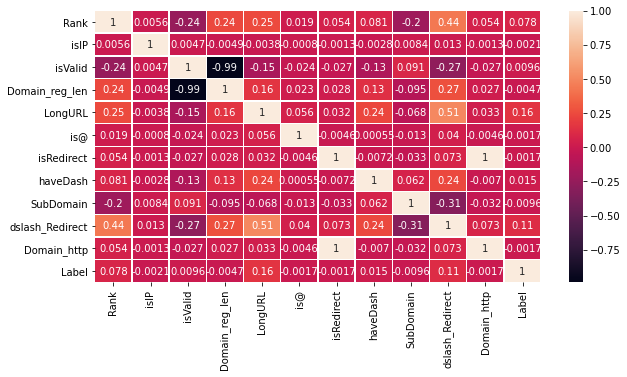

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(phishing_raw_df.corr(),annot=True, linewidth=0.5)

In [15]:
import lux
phishing_raw_df

,Rank,isIP,isValid,Domain_reg_len,LongURL,is@,isRedirect,haveDash,SubDomain,dslash_Redirect,Domain_http,Label
0,1,0,0,1,0,0,0,1,1,1,0,0
1,1,0,1,0,0,0,0,0,1,0,0,0
2,1,0,0,1,1,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,1,0,0,0
4,1,0,1,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95905,0,0,1,0,0,0,0,0,1,0,0,0
95906,1,0,1,0,0,0,0,1,1,0,0,0
95907,1,0,0,1,0,0,0,0,1,1,0,0
95908,0,0,1,0,0,0,0,0,1,0,0,0
